## Logistics regression algorithm

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [4]:
df = pd.read_csv(r"C:\Users\91842\OneDrive\Desktop\Machine Learning\Diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
x = df.iloc[:,[0,7]].values
y = df.iloc[:, -1].values

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [11]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [12]:
y_pred= classifier.predict(x_test)

In [13]:
print(y_test)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0]


In [14]:
print(y_pred)

[0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0]


In [15]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[117  13]
 [ 49  13]]


In [16]:
precision_recall_fscore_support(y_test,y_pred, average='macro')

(0.6024096385542168, 0.5548387096774193, 0.542997542997543, None)

In [17]:
precision_recall_fscore_support(y_test,y_pred, average='micro')

(0.6770833333333334, 0.6770833333333334, 0.6770833333333334, None)

In [18]:
precision_recall_fscore_support(y_test,y_pred, average='weighted')

(0.638679718875502, 0.6770833333333334, 0.6306690212940212, None)

In [19]:
accuracy_score(y_test,y_pred)

0.6770833333333334

In [20]:
Accuracy = metrics.accuracy_score(y_test,y_pred)
Accuracy

0.6770833333333334

In [21]:
classifier.intercept_
classifier.coef_

array([[0.05180623, 0.03442028]])

<function matplotlib.pyplot.show(close=None, block=None)>

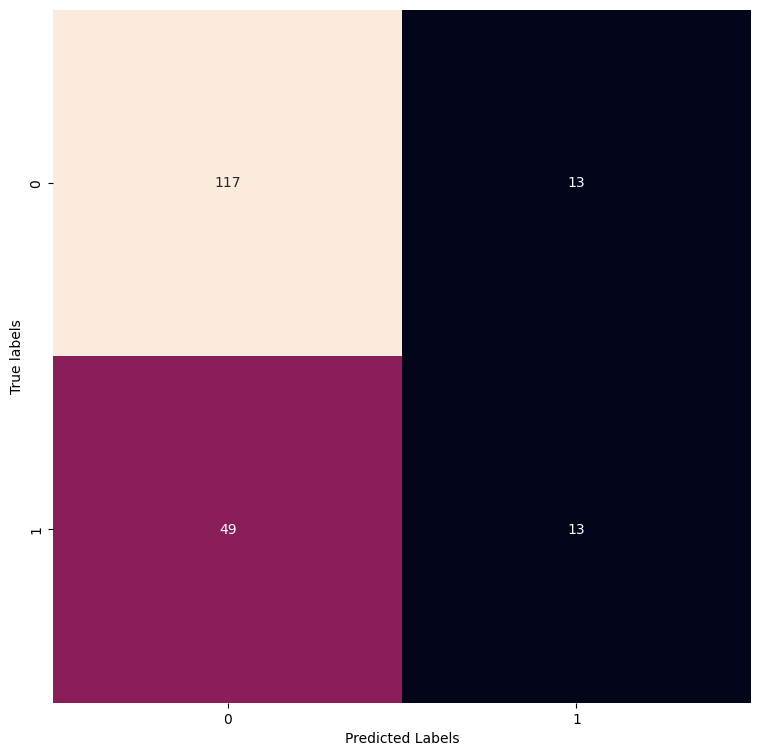

In [22]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True labels')
plt.show

In [23]:
precision, recall, f1_score,_ = precision_recall_fscore_support(y_test,y_pred)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1_score: ', f1_score)

Precision:  [0.70481928 0.5       ]
Recall:  [0.9        0.20967742]
F1_score:  [0.79054054 0.29545455]
